In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/Malgun.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font)

In [3]:
df = pd.read_csv('Data/#Final_Check.csv',encoding='cp949',index_col=0)
df.head(1)

,품종,색상,성별,체중,중성화여부,당시의나이,상태,접수일,직영,위탁
0,7,1,0,3.1,0,3,1,2017,1.0,NaN


In [5]:
df.drop('접수일',axis=1,inplace=True)

In [6]:
df = df.fillna(0)

df.drop('위탁',axis=1,inplace=True)

In [7]:
df['직영'] = pd.Categorical(df['직영'])

In [8]:
df = df[['품종','체중','색상','성별','중성화여부','당시의나이','직영','상태']]


In [296]:
df = pd.read_csv('./Data/Data.csv',encoding='utf-8')
df.head(2)

,품종,색상,성별,체중,중성화여부,당시의나이,보호소형태,상태
0,7,1,0,3.10,0,3,1,1
1,3,2,0,7.95,0,3,1,1


In [10]:
df['품종'] = df['품종'].astype('category')
df['색상'] = df['색상'].astype('category')
df['성별'] = df['성별'].astype('category')
df['중성화여부'] = df['중성화여부'].astype('category')
df['상태'] = df['상태'].astype('category')

In [12]:
df.head()

,품종,체중,색상,성별,중성화여부,당시의나이,직영,상태
0,7,3.10,1,0,0,3,1.0,1
1,3,7.95,2,0,0,3,1.0,1
2,4,2.75,4,1,0,2,1.0,1
3,4,4.00,3,0,1,1,1.0,1
4,7,3.00,3,1,1,5,1.0,1


In [14]:
df_3 = df[df['품종']==3]

### k-prototypes

In [15]:
import numpy as np
from kmodes.kprototypes import KPrototypes
import plotly.express as px

In [16]:
X = df_3.values

In [50]:
cost = []
for cluster in range(2, 5):
    kprototype = KPrototypes(n_clusters=cluster, verbose=2, random_state=42, max_iter=20)
    kprototype.fit_predict(X, categorical = [0,1,2,4,6,7])
    cost.append(kprototype.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 12461, ncost: 8108799.298998019
Run: 1, iteration: 2/20, moves: 2886, ncost: 8101134.658801062
Run: 1, iteration: 3/20, moves: 788, ncost: 8100555.831382821
Run: 1, iteration: 4/20, moves: 156, ncost: 8100530.813351472
Run: 1, iteration: 5/20, moves: 0, ncost: 8100530.813351472
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 3259, ncost: 8101533.540641549
Run: 2, iteration: 2/20, moves: 994, ncost: 8100590.750591815
Run: 2, iteration: 3/20, moves: 242, ncost: 8100530.813351421
Run: 2, iteration: 4/20, moves: 0, ncost: 8100530.813351421
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 72045, ncost: 8576908.405904064
Run: 3, iteration: 2/20, moves: 24924, ncost: 8183328.01922713
Run: 3, iteration: 3/20, moves: 9720, ncost: 8103570.236165429
Run: 3, iter

Run: 6, iteration: 5/20, moves: 5672, ncost: 6316825.543170496
Run: 6, iteration: 6/20, moves: 2128, ncost: 6316375.200504721
Run: 6, iteration: 7/20, moves: 240, ncost: 6316366.270097053
Run: 6, iteration: 8/20, moves: 37, ncost: 6316366.12739221
Run: 6, iteration: 9/20, moves: 0, ncost: 6316366.12739221
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/20, moves: 64904, ncost: 7006546.015750889
Run: 7, iteration: 2/20, moves: 33433, ncost: 6521605.736075254
Run: 7, iteration: 3/20, moves: 30464, ncost: 6328682.672663813
Run: 7, iteration: 4/20, moves: 10548, ncost: 6312182.2485260535
Run: 7, iteration: 5/20, moves: 3293, ncost: 6310869.683561251
Run: 7, iteration: 6/20, moves: 1434, ncost: 6309623.636601348
Run: 7, iteration: 7/20, moves: 3354, ncost: 6305029.725099171
Run: 7, iteration: 8/20, moves: 905, ncost: 6304827.201724925
Run: 7, iteration: 9/20, moves: 80, ncost: 6304825.612568971
Run: 7, iteration: 10/20, moves: 0, ncost: 6

KeyboardInterrupt: 

In [ ]:
plt.plot(kprototype)
plt.show()

In [105]:
df['Cluster_id'].value_counts()

0    303890
1     57305
Name: Cluster_id, dtype: int64

In [299]:
df_no_mix = df[df['품종']!=3]
df_mix =df[df['품종']==3]

In [300]:
df_no_mix

,품종,색상,성별,체중,중성화여부,당시의나이,보호소형태,상태
0,7,1,0,3.10,0,3,1,1
2,4,4,1,2.75,0,2,1,1
3,4,3,0,4.00,1,1,1,1
4,7,3,1,3.00,1,5,1,1
5,7,5,1,5.00,1,6,1,0
...,...,...,...,...,...,...,...,...
361190,9,1,1,6.00,0,0,0,0
361191,9,3,0,8.00,0,0,0,0
361192,9,5,1,1.86,0,0,0,0
361193,9,1,0,1.75,0,0,0,0


In [163]:
no_mix_X = df_no_mix.values
mix_X = df_mix.values

In [23]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242724 entries, 1 to 337421
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   품종      242724 non-null  category
 1   체중      242724 non-null  float64 
 2   색상      242724 non-null  category
 3   성별      242724 non-null  category
 4   중성화여부   242724 non-null  category
 5   당시의나이   242724 non-null  int64   
 6   상태      242724 non-null  category
dtypes: category(5), float64(1), int64(1)
memory usage: 6.7 MB


In [20]:
df_3.drop('직영', axis = 1, inplace = True)

In [ ]:
kproto = KPrototypes(n_clusters=2, verbose=0, random_state=42, max_iter=20) 
clusters = kproto.fit_predict(X, categorical=[0,2,3,4,6])

In [55]:
no_mix_kproto = KPrototypes(n_clusters=2, verbose=1, random_state=42, max_iter=20) 
no_mix_clusters = no_mix_kproto.fit_predict(no_mix_X, categorical=[0,1,2,4,6,7])

In [56]:
mix_kproto = KPrototypes(n_clusters=2, verbose=1, random_state=42, max_iter=20) 
mix_clusters = mix_kproto.fit_predict(mix_X, categorical=[0,1,2,4,6,7])

In [111]:
kproto.cost_

6087312.726296709

In [164]:
no_mix_kproto.cost_

2949160.2475659647

In [165]:
mix_kproto.cost_

4353880.640076008

In [215]:
clusters

array([1, 0, 1, ..., 1, 1, 1], dtype=uint16)

In [60]:
no_mix_clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=uint16)

In [61]:
mix_clusters

array([1, 1, 1, ..., 1, 0, 0], dtype=uint16)

In [220]:
df['Cluster_id'] = clusters
print(df['Cluster_id'].value_counts())

1    194876
0    120652
2     45667
Name: Cluster_id, dtype: int64


In [167]:
df_no_mix['Cluster_id'] = no_mix_clusters
df_mix['Cluster_id'] = mix_clusters

In [168]:
print(df_no_mix['Cluster_id'].value_counts())
print()
print(df_mix['Cluster_id'].value_counts())

1    82644
0    18127
Name: Cluster_id, dtype: int64

1    210444
0     49980
Name: Cluster_id, dtype: int64


In [251]:
df_1 = df_no_mix[df_no_mix['Cluster_id']==1]

In [301]:
df_no_mix

,품종,색상,성별,체중,중성화여부,당시의나이,보호소형태,상태
0,7,1,0,3.10,0,3,1,1
2,4,4,1,2.75,0,2,1,1
3,4,3,0,4.00,1,1,1,1
4,7,3,1,3.00,1,5,1,1
5,7,5,1,5.00,1,6,1,0
...,...,...,...,...,...,...,...,...
361190,9,1,1,6.00,0,0,0,0
361191,9,3,0,8.00,0,0,0,0
361192,9,5,1,1.86,0,0,0,0
361193,9,1,0,1.75,0,0,0,0


In [321]:
from sklearn.model_selection import train_test_split

X = df_no_mix[['품종', '색상', '성별', '체중', '중성화여부', '당시의나이', '보호소형태']]
X_train, X_test, y_train, y_test = train_test_split(X, df_no_mix['상태'], test_size = 0.2, random_state = 23, stratify=df_no_mix['상태'])

In [322]:
from lightgbm import LGBMClassifier
from lightgbm import plot_importance, plot_metric, plot_tree
from sklearn.model_selection import train_test_split, cross_validate

lgbm_wrapper_classifier = LGBMClassifier(n_estimators = 200)
evals = [(X_test, y_test)]
lgbm_wrapper_classifier.fit(X_train, y_train, early_stopping_rounds = 50, eval_metric = 'logloss', eval_set = evals, verbose = True)
preds = lgbm_wrapper_classifier.predict(X_test)
pred_proba = lgbm_wrapper_classifier.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.671222
Training until validation scores don't improve for 50 rounds
[2]	valid_0's binary_logloss: 0.663148
[3]	valid_0's binary_logloss: 0.656525
[4]	valid_0's binary_logloss: 0.651251
[5]	valid_0's binary_logloss: 0.646732
[6]	valid_0's binary_logloss: 0.643003
[7]	valid_0's binary_logloss: 0.639974
[8]	valid_0's binary_logloss: 0.637324
[9]	valid_0's binary_logloss: 0.635025
[10]	valid_0's binary_logloss: 0.63309
[11]	valid_0's binary_logloss: 0.631412
[12]	valid_0's binary_logloss: 0.630005
[13]	valid_0's binary_logloss: 0.628745
[14]	valid_0's binary_logloss: 0.62777
[15]	valid_0's binary_logloss: 0.62701
[16]	valid_0's binary_logloss: 0.626244
[17]	valid_0's binary_logloss: 0.62552
[18]	valid_0's binary_logloss: 0.62494
[19]	valid_0's binary_logloss: 0.624387
[20]	valid_0's binary_logloss: 0.623916
[21]	valid_0's binary_logloss: 0.623532
[22]	valid_0's binary_logloss: 0.623174
[23]	valid_0's binary_logloss: 0.622833
[24]	valid_0's binary_logloss: 0.

In [323]:
cross_val = cross_validate(estimator = lgbm_wrapper_classifier, X = X, y = df_no_mix['상태'], cv = 3)
print(cross_val['test_score'])
print('avg test score : {:.4f} (+/-{:.4f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

[0.64219583 0.65406371 0.64507294]
avg test score : 0.6471 (+/-0.0051)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

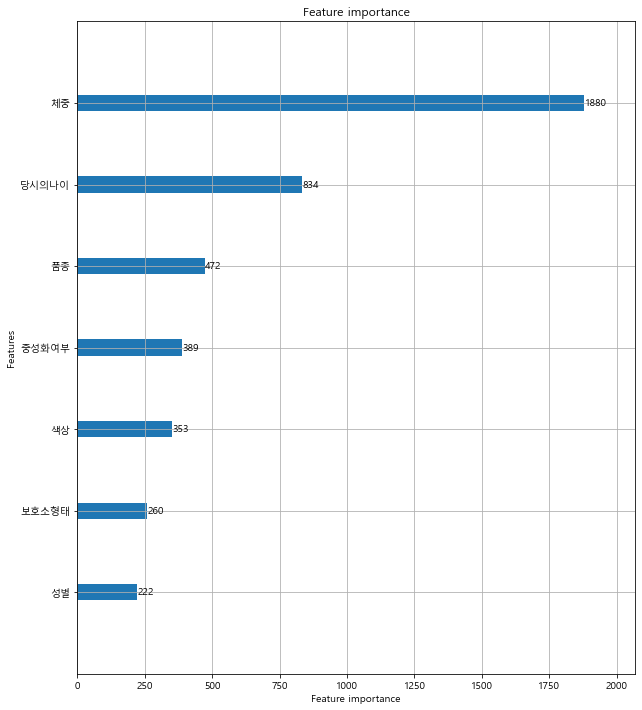

In [324]:
from lightgbm import plot_importance
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(lgbm_wrapper_classifier, ax = ax)

In [325]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [326]:
knn_clf = KNeighborsClassifier(n_neighbors = 4)
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators = 100)
lr_final = LogisticRegression(C = 2)

In [327]:
knn_clf.fit(X_train, y_train) 
rf_clf.fit(X_train, y_train) 
dt_clf.fit(X_train, y_train) 
ada_clf.fit(X_train, y_train) 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [328]:
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도 : {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도 : {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도 : 0.6003
랜덤 포레스트 정확도 : 0.6325
결정 트리 정확도 : 0.6173
에이다부스트 정확도 : 0.6507


In [329]:
knn_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [330]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
pred = np.transpose(pred)

In [331]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도 : 0.6554


[2개 군집분석]
stack : 0.6818 전체 클러스터 0값
light : 0.72 전체 클러스터 1값
    

In [181]:
from sklearn.neural_network import MLPClassifier


MLP = MLPClassifier(hidden_layer_sizes=[100,10], random_state = 0, max_iter= 5000)

MLP.fit(X_train,y_train)

print(MLP.score(X_train,y_train))
print(MLP.score(X_test,y_test))


0.6676245935113061
0.6654970052634763


In [ ]:
0.66

In [142]:
X.shape

(194876, 7)

In [146]:
from pycaret.classification import *

In [182]:
df_1

,품종,색상,성별,체중,중성화여부,당시의나이,보호소형태,상태,Cluster_id
0,7,1,0,3.10,0,3,1,1,1
2,4,4,1,2.75,0,2,1,1,1
3,4,3,0,4.00,1,1,1,1,1
4,7,3,1,3.00,1,5,1,1,1
5,7,5,1,5.00,1,6,1,0,1
...,...,...,...,...,...,...,...,...,...
361190,9,1,1,6.00,0,0,0,0,1
361191,9,3,0,8.00,0,0,0,0,1
361192,9,5,1,1.86,0,0,0,0,1
361193,9,1,0,1.75,0,0,0,0,1


In [184]:
df

,품종,색상,성별,체중,중성화여부,당시의나이,보호소형태,상태
0,7,1,0,3.10,0,3,1,1
2,4,4,1,2.75,0,2,1,1
3,4,3,0,4.00,1,1,1,1
4,7,3,1,3.00,1,5,1,1
5,7,5,1,5.00,1,6,1,0
...,...,...,...,...,...,...,...,...
361190,9,1,1,6.00,0,0,0,0
361191,9,3,0,8.00,0,0,0,0
361192,9,5,1,1.86,0,0,0,0
361193,9,1,0,1.75,0,0,0,0


In [183]:
df = df_1.iloc[:,:-1]

In [185]:
clf = setup(data = df, target = '상태', train_size = 0.8, session_id = 6)

,Description,Value
0,session_id,6
1,Target,상태
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(82644, 8)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [186]:
models(internal = True)[['Name', 'GPU Enabled']]

,Name,GPU Enabled
ID,,
lr,Logistic Regression,False
knn,K Neighbors Classifier,False
nb,Naive Bayes,False
dt,Decision Tree Classifier,False
svm,SVM - Linear Kernel,False
rbfsvm,SVM - Radial Kernel,False
gpc,Gaussian Process Classifier,False
mlp,MLP Classifier,False
ridge,Ridge Classifier,False


In [187]:
best3models = compare_models(sort = 'Accuracy', n_select = 3, fold = 2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6643,0.6943,0.8349,0.6749,0.7464,0.2660,0.2795,0.6200
gbc,Gradient Boosting Classifier,0.6633,0.6915,0.8464,0.6708,0.7484,0.2594,0.2759,1.0700
lda,Linear Discriminant Analysis,0.6551,0.6810,0.8445,0.6640,0.7435,0.2396,0.2563,0.1600
ridge,Ridge Classifier,0.6550,0.0000,0.8477,0.6631,0.7441,0.2382,0.2557,0.1150
ada,Ada Boost Classifier,0.6550,0.6841,0.8389,0.6654,0.7421,0.2414,0.2566,0.5250
lr,Logistic Regression,0.6549,0.6812,0.8414,0.6646,0.7427,0.2402,0.2560,1.4550
svm,SVM - Linear Kernel,0.6504,0.0000,0.8255,0.6662,0.7356,0.2342,0.2510,0.2650
nb,Naive Bayes,0.6402,0.6530,0.7634,0.6727,0.7152,0.2319,0.2354,1.1450
rf,Random Forest Classifier,0.6236,0.6423,0.7202,0.6691,0.6937,0.2073,0.2082,0.7800
knn,K Neighbors Classifier,0.6229,0.6348,0.7230,0.6674,0.6941,0.2045,0.2056,2.6650


In [188]:
stacker = stack_models(estimator_list = best3models[1:], meta_model = best3models[0], fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6625,0.6906,0.8391,0.6720,0.7464,0.2600,0.2747
1,0.6665,0.6937,0.8407,0.6753,0.7490,0.2694,0.2841
2,0.6655,0.6972,0.8326,0.6767,0.7466,0.2698,0.2826
Mean,0.6648,0.6938,0.8375,0.6747,0.7473,0.2664,0.2805
SD,0.0017,0.0027,0.0035,0.0019,0.0012,0.0045,0.0041


In [207]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [208]:
pred = model.predict(X_test)

print('Logistic 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

Logistic 정확도 : 0.6840


In [209]:
def get_clf_eval(y_test, y_pred, probs):
#     confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, probs)
    print('정확도:{0:.4f}, 정밀도 {1:.4f}, 재현율 :{2:.4f}, F1:{3:.4f}, AUC:{4:4f}'.format(accuracy, precision,recall,F1,AUC))

In [210]:
from sklearn.metrics import precision_recall_curve

get_clf_eval(y_test, final, final_proba)
precision_recall_curve_plot(y_test, final_proba)

NameError: name 'final_proba' is not defined

In [211]:
import matplotlib as mpl
from sklearn import metrics

0.5320536951986997


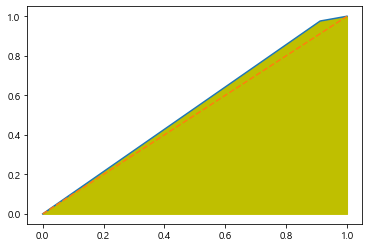

In [260]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, final)

plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, color = 'y')
plt.plot([0,1], [0,1], '--')
score = metrics.auc(fpr, tpr)
print(score)
plt.show()

In [270]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.62      0.14      0.23      2537
           1       0.70      0.96      0.81      5251

    accuracy                           0.69      7788
   macro avg       0.66      0.55      0.52      7788
weighted avg       0.67      0.69      0.62      7788

